# Giới Thiệu
- Trong bối cảnh cạnh tranh ngày càng gay gắt, việc hiểu rõ hành vi và đặc điểm của khách hàng trở thành yếu tố then chốt giúp doanh nghiệp nâng cao hiệu quả chiến dịch marketing. Đề tài “Phân tích dữ liệu Marketing Campaign” được thực hiện nhằm khai thác và đánh giá các yếu tố ảnh hưởng đến phản hồi của khách hàng trong một chiến dịch tiếp thị trực tiếp của doanh nghiệp.

- Bộ dữ liệu được sử dụng chứa thông tin về nhân khẩu học (tuổi, tình trạng hôn nhân, thu nhập), hành vi tiêu dùng (tần suất mua hàng, số lượng sản phẩm tiêu thụ, kênh mua hàng) và phản hồi của khách hàng đối với chiến dịch marketing.

- Thông qua việc áp dụng các phương pháp phân tích đơn biến và đa biến, kết hợp với công cụ trực quan hóa dữ liệu như Sweetviz và AutoViz, nhóm hướng đến việc:

    - Hiểu rõ đặc điểm khách hàng có khả năng phản hồi cao.

    - Xác định những yếu tố ảnh hưởng mạnh đến kết quả chiến dịch.

    - Đề xuất hướng phân khúc khách hàng tiềm năng và chiến lược marketing hiệu quả hơn trong tương lai.

## Chuẩn bị môi trường

In [ ]:
!pip install autoviz sweetviz

Defaulting to user installation because normal site-packages is not writeable


## Khai báo thư viện cần thiết

In [ ]:
import autoviz as av
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class


## Load Dataset

In [ ]:
 # đọc dữ liệu và sep='\t' nghĩa mỗi dữ liệu cách nhau bởi tab
mc_df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
# Xem 5 dong đầu của dữ liệu
mc_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Xem và tóm tắt các cột trong bảng

In [ ]:
# Liệt kê tên các cột.
mc_df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### Nhận xét về từng cột trong file


**1.Thông tin cá nhân**
- `ID`: Mã khách hàng duy nhất → chỉ dùng để định danh, không có ý nghĩa phân tích.
- `Year_Birth`: Năm sinh → dùng để tính tuổi, có thể tạo cột “Age”.
- `Education`: Trình độ học vấn → dạng chuỗi (`categorical`), có thể mã hóa (`Label`/`One-hot`).
- `Marital_Status`: Tình trạng hôn nhân → dạng chuỗi, ảnh hưởng đến hành vi tiêu dùng.
- `Income`: Thu nhập hàng năm → giá trị số, cần xử lý giá trị thiếu và ngoại lai.
Thông tin gia đình
- `Kidhome`: Số trẻ em trong gia đình.
- `Teenhome`: Số thiếu niên trong gia đình.
→ Có thể gộp lại thành `“Family_Size` = `Kidhome` + `Teenhome` + 2”.

**2.Thời gian & tương tác**
- `Dt_Customer`: Ngày khách hàng bắt đầu tham gia → nên chuyển về kiểu datetime.
- `Recency`: Số ngày kể từ lần mua hàng gần nhất → giá trị nhỏ nghĩa là khách hàng mới hoạt động gần đây.

**3.Chi tiêu (Monetary)**
- `MntWines`: Số tiền chi cho rượu vang.
- `MntFruits`: Số tiền chi cho trái cây.
- `MntMeatProducts`: Số tiền chi cho thịt.
- `MntFishProducts`: Số tiền chi cho cá.
- `MntSweetProducts`: Số tiền chi cho đồ ngọt.
- `MntGoldProds`: Số tiền chi cho sản phẩm cao cấp.
→ Có thể gộp thành cột tổng chi tiêu: `TotalSpend`.

**4.Hành vi mua sắm (Frequency)**
- `NumDealsPurchases`: Số lần mua hàng có khuyến mãi → thể hiện mức độ nhạy cảm giá.
- `NumWebPurchases`: Số lần mua qua website → hành vi online.
- `NumCatalogPurchases`: Số lần mua qua catalog → hành vi truyền thống.
- `NumStorePurchases`: Số lần mua tại cửa hàng → hành vi offline.
- `NumWebVisitsMonth`: Số lần truy cập website mỗi tháng → thể hiện mức độ quan tâm.

**5.Chiến dịch marketing**
- `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`:
Tham gia (1) hoặc không tham gia (0) các chiến dịch trước.
- `Response`: Kết quả của chiến dịch gần nhất → biến mục tiêu (target) trong phân tích.
- `Complain`: Khách hàng có khiếu nại hay không (1 = có).

**6.Cột kỹ thuật**
- `Z_CostContact`: Chi phí cố định khi liên hệ khách hàng (thường là giá trị giống nhau).
- `Z_Revenue`: Doanh thu cố định, thường không có ý nghĩa phân tích.

**Tổng kết:**

- Input (biến độc lập): 27 cột
- Output (biến phụ thuộc): 1 cột (Response)
- Không dùng: 1 cột (ID)

### Thông tin tổng quát về dữ liệu

In [ ]:
# Cho biết kiểu dữ liệu (dtype) của từng cột và số lượng giá trị không bị null.
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Nhận xét
- Bộ dữ liệu có 2.240 dòng và 29 cột, tương ứng với thông tin của 2.240 khách hàng trong chiến dịch marketing.
- Gồm 25 cột kiểu số nguyên (`int64`), 1 cột số thực (`float64`), và 3 cột chuỗi (`object`).
- Cột `Income` có 24 giá trị bị thiếu

### Thống kê mô tả

In [ ]:
# Tạo bảng thống kê số liệu (mean, std, min, max, quartiles) cho các cột số.
mc_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Nhận xét kết quả thống kê mô tả

**Số lượng quan sát (count):**
- Hầu hết các biến có 2.240 giá trị, riêng cột Income chỉ có 2.216 giá trị, cho thấy có dữ liệu bị thiếu cần được xử lý.

**Giá trị trung bình (mean):**

- Year_Birth có trung bình khoảng 1968, tức là độ tuổi trung bình của khách hàng khoảng 55 tuổi (tính đến năm 2023).

- Income trung bình khoảng 52.000–54.000 đơn vị tiền tệ, thể hiện mức thu nhập khá cao.

- Các khoản chi tiêu như MntWines, MntMeatProducts và MntGoldProds có giá trị trung bình lớn hơn các nhóm sản phẩm khác → khách hàng chi nhiều cho rượu vang, thịt, vàng.

**Độ lệch chuẩn (std):**

- Income và các biến chi tiêu (Mnt*) có độ lệch chuẩn lớn → mức chi tiêu chênh lệch mạnh giữa các khách hàng.

- Recency (mức độ mới của lần mua gần nhất) dao động lớn, thể hiện khách hàng có tần suất mua hàng rất khác nhau.

**Giá trị cực trị (min, max):**

- Một số biến như MntWines, MntMeatProducts có giá trị max cao (lên đến hàng nghìn) → xuất hiện một số khách hàng chi tiêu rất cao (outliers).

- NumWebVisitsMonth dao động từ 0 đến 20, cho thấy sự đa dạng trong tần suất truy cập website.

## Xử lý dữ liệu

### Làm sạch dữ liệu
**Một số cột không cần thiết cho việc phân tích nhóm khách hàng và nên được loại bỏ để giảm nhiễu:**

- `ID`: Mã định danh duy nhất của khách hàng. Nó không mang ý nghĩa phân tích và chỉ dùng để nhận dạng khách hàng.

- `Dt_Customer`: Ngày khách hàng đăng ký. Mặc dù có thể dùng để tính tuổi đời khách hàng, nhưng Recency (thời gian mua hàng gần nhất) thường mang ý nghĩa thực tế hơn cho việc phân tích hành vi.

- `Z_CostContact`: Cột hằng số (toàn 3), không có ý nghĩa thống kê.

- `Z_Revenue`: Cột hằng số (toàn 11), không đóng góp thông tin cho phân tích.

In [ ]:
cols_to_use = [
    'Year_Birth', 'Education', 'Marital_Status', 'Income',
    'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Complain', 'Response'
]
mc_df = mc_df[cols_to_use]


### Kiểm tra giá trị thiếu và thay thế

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
mc_df[cols_to_use].isnull().sum().sort_values(ascending=False)

Income                 24
Year_Birth              0
NumDealsPurchases       0
Complain                0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
AcceptedCmp2            0
AcceptedCmp1            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Education               0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Teenhome                0
Kidhome                 0
Marital_Status          0
Response                0
dtype: int64

#### Nhận xét:
- Dữ liệu ở cột `Income` bị thiếu 24 bộ dữ liệu.
- Xử lý bằng cách điền giá trị thiếu bằng trung vị.

In [ ]:
# Điền giá trị thiếu bằng trung vị
mc_df['Income'].fillna(mc_df['Income'].median(), inplace=True)

In [ ]:
# Kiểm tra lại sau khi đã điền giá trị thiếu
mc_df.isnull().sum().sort_values(ascending=False)

Year_Birth             0
NumDealsPurchases      0
Complain               0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
AcceptedCmp2           0
AcceptedCmp1           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Education              0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Response               0
dtype: int64

### Kiểm tra dữ liệu trùng

In [ ]:
# Kiểm tra dòng trùng
mc_df.duplicated().sum()

182

#### Nhận xét:
- Có khoảng 182 bộ dữ liệu bị trùng.

- Cách xử lí là xóa toàn bộ những dữ liệu bị trùng.


In [ ]:
mc_df.drop_duplicates(inplace=True)
mc_df.duplicated().sum()

0

#### Nhận xét:
- Dữ liệu bị trùng đã được xóa.

## Phân tích khám phá dữ liệu đơn biến và đa biến bằng Sweetviz và Autoviz

### Sweetviz

In [ ]:
report = sv.analyze(mc_df)
report.show_html("sweetviz_report.html")


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Phân tích biến `Income` (Thu nhập khách hàng)
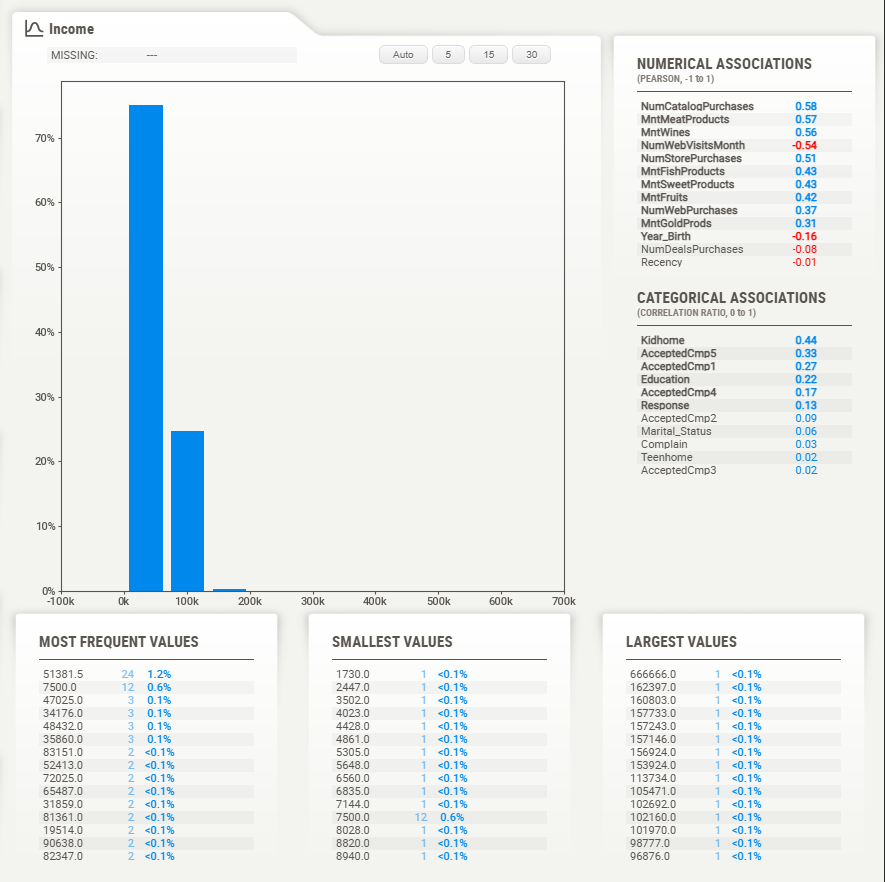

**Nhận xét:**

- Phân phối: tập trung chủ yếu ở khoảng 0–100,000, một số ít >200,000 → có ngoại lai cần xem xét.

- Giá trị trung bình: khoảng 52,000, dao động lớn.

- Tương quan:

    - Dương mạnh với `NumCatalogPurchases`, `MntWines`, `MntMeatProducts` → thu nhập cao chi tiêu nhiều.

    - Âm nhẹ với `Recency`, `NumDealsPurchases` → người thu nhập cao ít mua hàng giảm giá.

- Kết luận: `Income` là biến quan trọng phản ánh sức mua và khả năng phản hồi chiến dịch, nhưng cần xử lý ngoại lai trước khi phân tích sâu.

#### Phân tích biến `Education`(Trình độ học vấn)
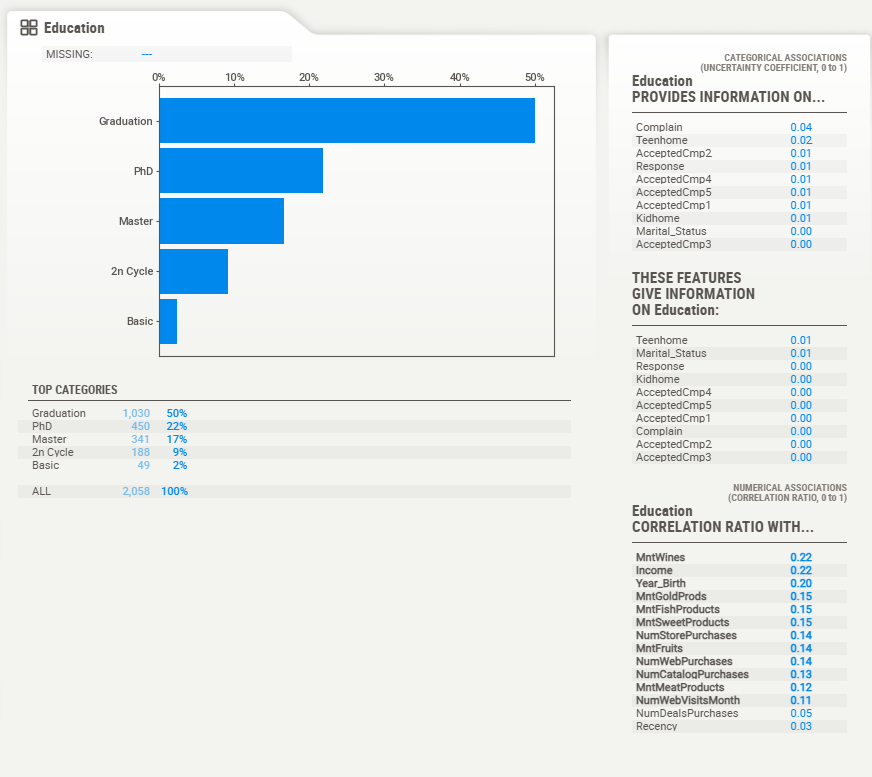
**Nhận xét**
- Biến `Education` gồm 5 nhóm: Graduation (50%), PhD (22%), Master (17%), 2n Cycle (9%), Basic (2%) → nhóm Graduation chiếm tỷ lệ cao nhất, cho thấy phần lớn khách hàng có trình độ đại học.

- Sự phân bố học vấn khá mất cân bằng, các nhóm Basic và 2n Cycle có tỷ lệ rất thấp, có thể cân nhắc gộp nhóm khi xử lý dữ liệu.

- Về mối quan hệ với các biến số lượng, `Education` có tương quan nhẹ với `Income` (0.22) và `MntWines` (0.22) → cho thấy người có học vấn cao thường có thu nhập và chi tiêu cao hơn.

- Tương quan với `Response` (0.01) rất thấp → học vấn không ảnh hưởng rõ ràng đến phản hồi chiến dịch marketing.

- Tổng thể, `Education` phản ánh tốt phân khúc nhân khẩu học nhưng không phải yếu tố chính quyết định hành vi phản hồi.

#### Phân tích `Marital_Status`(Tình trạng hôn nhân)

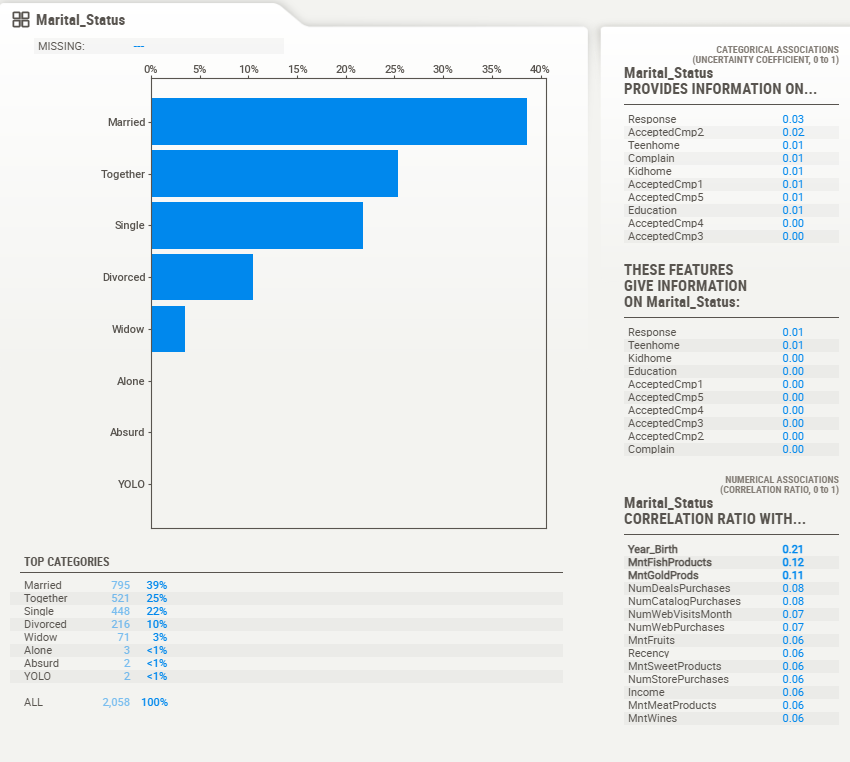

**Nhận xét**

- Biến `Marital_Status` có 8 nhóm, trong đó Married (39%) và Together (25%) chiếm tỷ lệ cao nhất → phần lớn khách hàng sống cùng bạn đời hoặc đã kết hôn.

- Các nhóm Single (22%) và Divorced (10%) chiếm tỷ lệ trung bình, còn lại (Widow, Alone, Absurd, YOLO) rất ít (<3%), có thể gộp nhóm nhỏ để dễ phân tích.

- Tương quan số học cao nhất với `Year_Birth` (0.21) → độ tuổi có ảnh hưởng nhẹ đến tình trạng hôn nhân.

- Một số biến có tương quan nhỏ như `MntFishProducts` (0.12) và `MntGoldProds` (0.11) → người đã kết hôn có xu hướng chi tiêu nhiều hơn ở các danh mục sản phẩm này.

- Tương quan với `Response` (0.01) rất thấp → tình trạng hôn nhân không ảnh hưởng đáng kể đến việc phản hồi chiến dịch marketing.

#### Phân tích `Recency`(tần suất mua hàng gần đây)

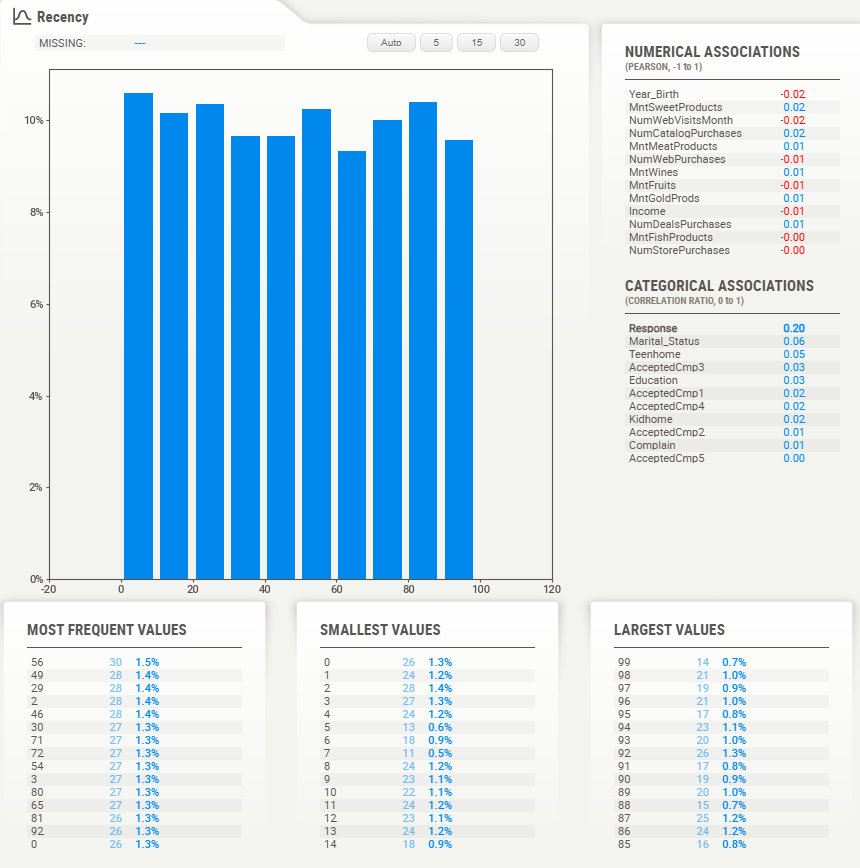

- `Recency` thể hiện số ngày kể từ lần mua hàng gần nhất.

- Phân bố khá đồng đều, không có xu hướng rõ rệt → khách hàng mua hàng rải rác trong thời gian dài, không tập trung vào giai đoạn nào.

- Tương quan cao nhất với `Response` (0.20) → những khách hàng mới mua gần đây có xu hướng phản hồi tích cực hơn trong chiến dịch marketing.

- Các biến khác có tương quan rất thấp (|r| < 0.05), chứng tỏ `Recency` hầu như độc lập với các đặc điểm nhân khẩu học và hành vi mua khác.

- Nhìn chung, `Recency` là chỉ số quan trọng trong mô hình RFM, giúp nhận diện mức độ gắn bó hiện tại của khách hàng.

#### Phân tích `NumStorePurchases`(Số lần mua hàng tại cửa hàng)

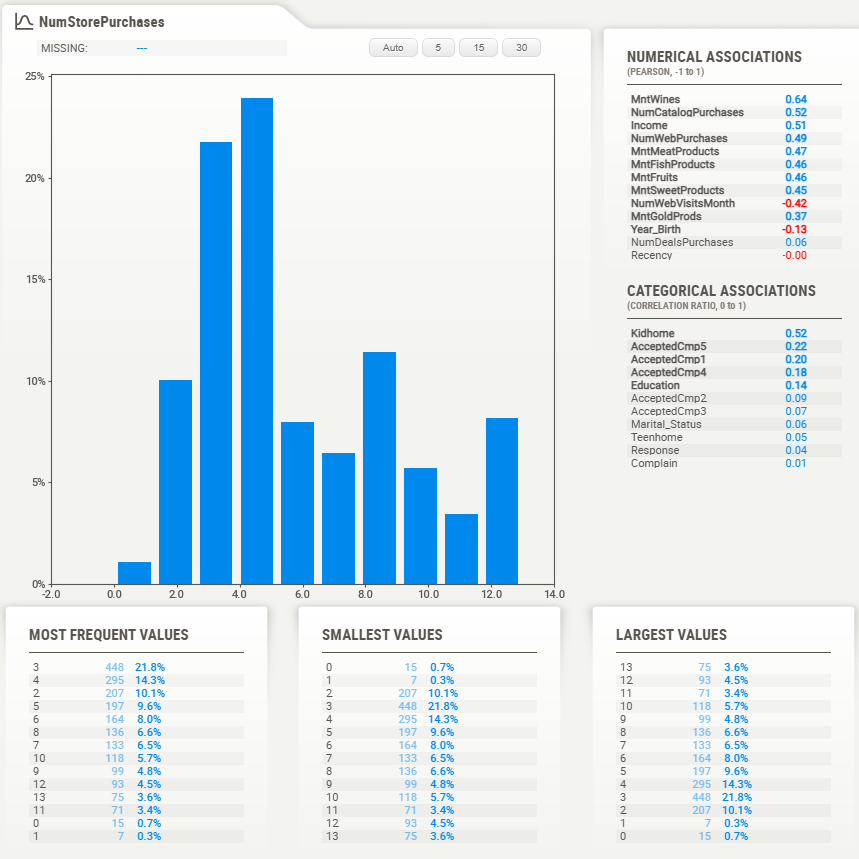

**Nhận xét**

- Phân phối: Giá trị phổ biến nhất là 3 và 4 lần mua, chiếm hơn 35% tổng số khách hàng.

- Nhận xét: Đa số khách hàng mua hàng tại cửa hàng từ 2–5 lần, cho thấy hành vi mua tại cửa hàng khá phổ biến.

- Tương quan:

    - Tương quan mạnh với `MntWines` (0.64), `NumCatalogPurchases` (0.52) và `Income` (0.51) → khách hàng có thu nhập cao thường chi tiêu nhiều hơn tại cửa hàng.

    - Có mối liên hệ với `Kidhome` (0.52) → gia đình có con nhỏ có xu hướng mua trực tiếp nhiều hơn.

- Kết luận: Nhóm khách hàng có thu nhập cao, gia đình có con và mua rượu thường xuyên là đối tượng tiềm năng cho các chiến dịch khuyến mãi tại cửa hàng.

### Autoviz

In [ ]:
%matplotlib inline
AV = AutoViz_Class()

# Chạy AutoViz phân tích đa biến
AV.AutoViz(
    filename='',          # Để trống nếu dùng DataFrame
    dfte=mc_df,           # Dữ liệu của bạn
    depVar='Response',    # Biến mục tiêu (output)
    verbose=2,            # Hiển thị thông tin chi tiết
    chart_format='png'    # Định dạng biểu đồ
)

plt.close('all')

Shape of your Data Set loaded: (2058, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Income']
    Integer-Categorical Columns: ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    String-Categorical Columns: ['Education', 'Marital_Status']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    Discrete String Columns: []
  

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Year_Birth,int64,0.000000,2,1893.000000,1996.000000,Column has 3 outliers greater than upper bound (2004.00) or lower than lower bound(1932.00). Cap them or remove them.
Education,object,0.000000,0,,,No issue
Marital_Status,object,0.000000,0,,,"3 rare categories: ['Alone', 'Absurd', 'YOLO']. Group them into a single category or drop the categories."
Income,float64,0.000000,NA,1730.000000,666666.000000,Column has 8 outliers greater than upper bound (117053.62) or lower than lower bound(-13109.38). Cap them or remove them.
Kidhome,int64,0.000000,0,0.000000,2.000000,No issue
Teenhome,int64,0.000000,0,0.000000,2.000000,No issue
Recency,int64,0.000000,4,0.000000,99.000000,No issue
MntWines,int64,0.000000,37,0.000000,1493.000000,Column has 33 outliers greater than upper bound (1225.50) or lower than lower bound(-698.50). Cap them or remove them.
MntFruits,int64,0.000000,7,0.000000,199.000000,Column has 207 outliers greater than upper bound (81.00) or lower than lower bound(-47.00). Cap them or remove them.
MntMeatProducts,int64,0.000000,27,0.000000,1725.000000,Column has 174 outliers greater than upper bound (549.75) or lower than lower bound(-304.25). Cap them or remove them.


All Plots are saved in .\AutoViz_Plots\Response
Time to run AutoViz = 6 seconds 


#### Phân tích về biểu đồ Heat Map

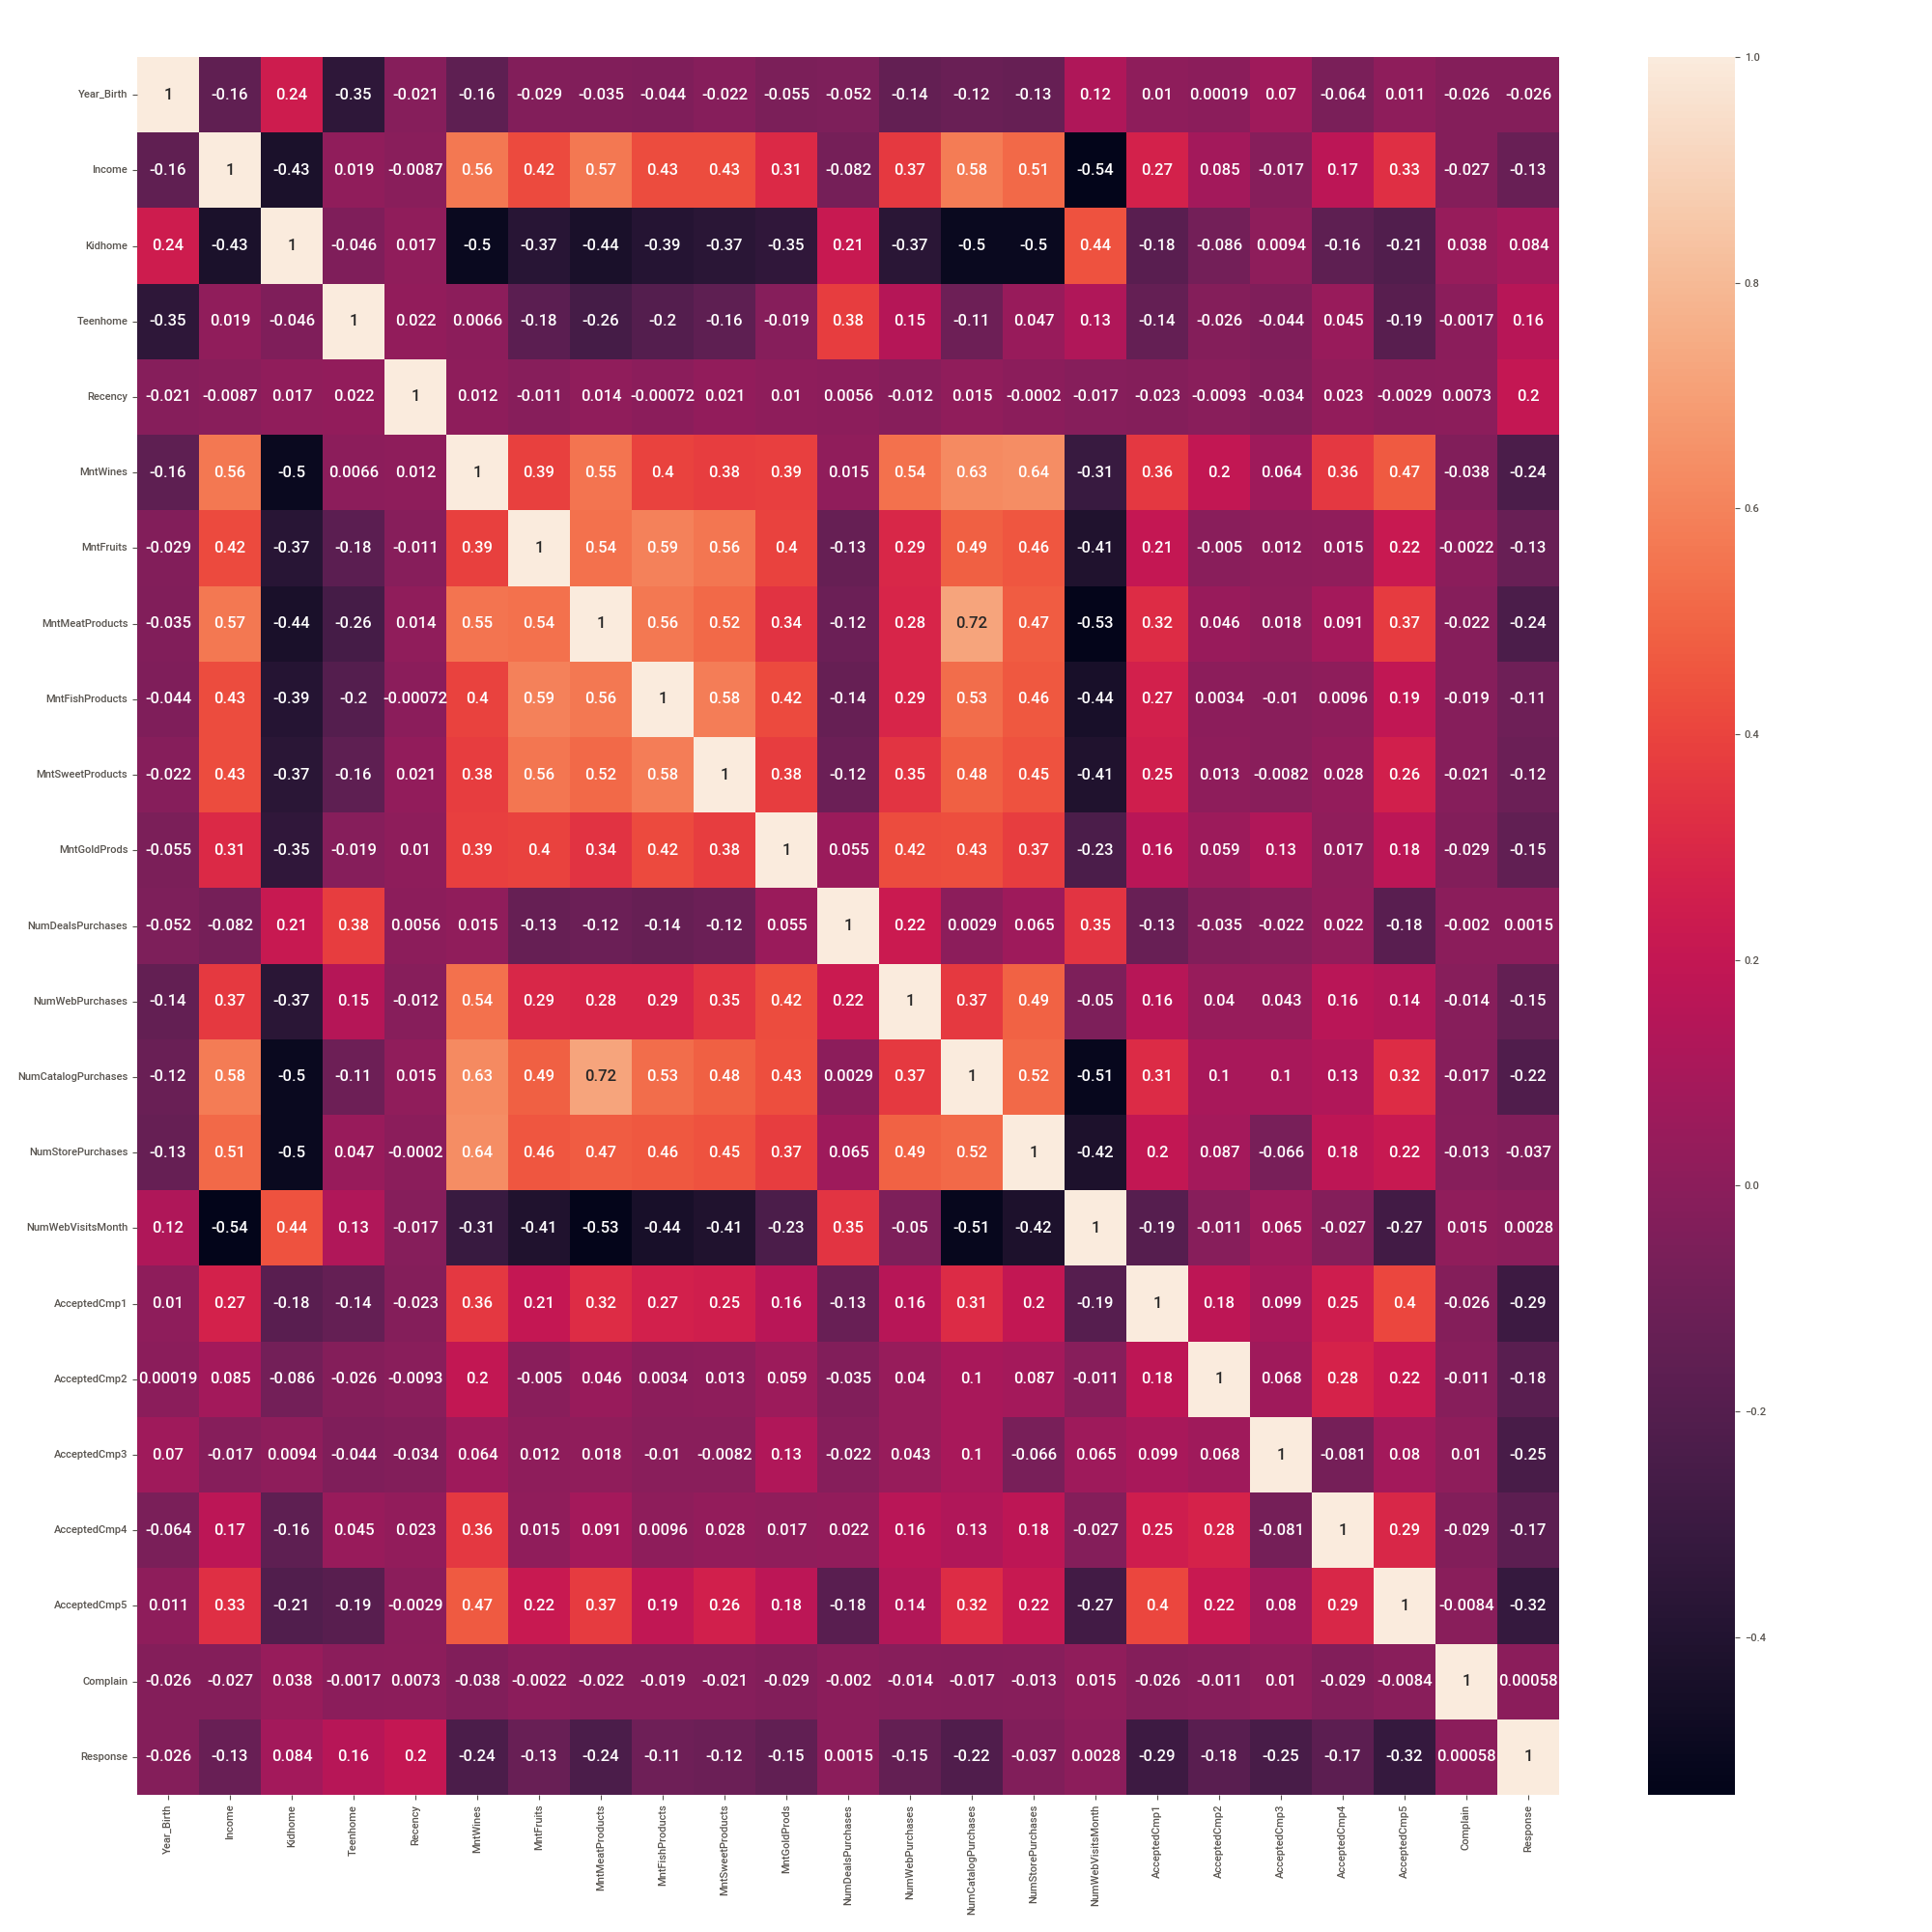

**Nhận xét:**

- Các nhóm biến chi tiêu (Mnt) như `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`
→ tương quan dương rất mạnh với nhau (hệ số 0.5–0.8) → những người chi nhiều cho một loại hàng thường chi nhiều cho các loại khác → thể hiện nhóm khách hàng có sức mua cao, thu nhập cao.

- `Income` (thu nhập) có tương quan dương rõ với `MntWines`, `MntGoldProds`, `MntMeatProducts` (~0.5–0.6)
→ thu nhập càng cao, chi tiêu càng lớn cho các mặt hàng giá trị cao.

- `Response` (phản hồi chiến dịch) có tương quan yếu với các biến khác (hệ số ~0.1–0.2)
→ nghĩa là việc tham gia chiến dịch không phụ thuộc mạnh vào thu nhập hay chi tiêu, có thể do yếu tố khác như Marketing Channel, Frequency, hoặc thời gian.

- Một số biến như `Year_Birth`, `Kidhome`, `Teenhome` có tương quan âm nhẹ với chi tiêu
→ người lớn tuổi hơn hoặc có nhiều con thường chi tiêu ít hơn cho các sản phẩm xa xỉ.

- Không có hiện tượng đa cộng tuyến nghiêm trọng ngoài nhóm “Mnt” vì chúng cùng hướng về hành vi chi tiêu.

#### Phân tích giữa `Income` và `Response`

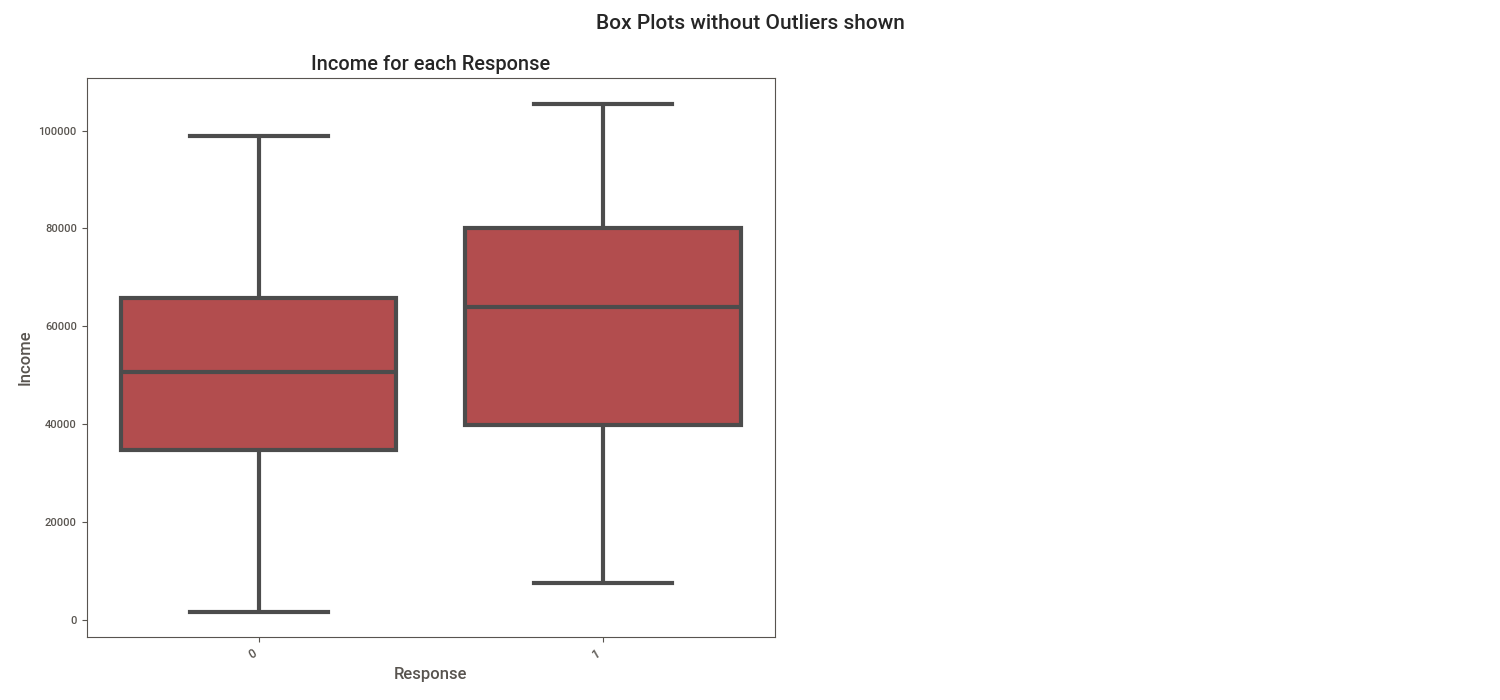

**Nhận xét:**

- Nhóm Response = 1 có thu nhập trung bình và trung vị cao hơn rõ rệt so với nhóm Response = 0.
→ Gợi ý rằng khả năng phản hồi (hoặc mua hàng) tăng theo mức thu nhập.

- Phạm vi phân bố của nhóm 1 cũng rộng hơn, cho thấy nhóm này bao gồm cả những người thu nhập cao và trung bình.

- Không có outlier (điểm ngoại lai) được hiển thị trong biểu đồ này (đã bị ẩn đi), nên dữ liệu có vẻ tương đối “sạch”.

#### Phân tích biến Income và NumStorePurchases

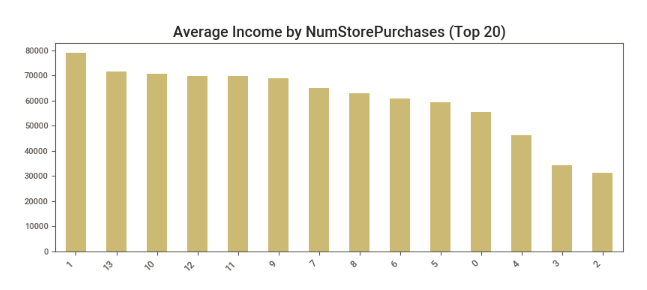

**Nhận xét:**

- Khi NumStorePurchases tăng, thu nhập trung bình cũng tăng rõ rệt.
→ Người có thu nhập cao thường mua hàng tại cửa hàng nhiều hơn.

- Nhóm có 1 lần mua lại có thu nhập cao nhất (~80,000), điều này có thể do:

- Họ là khách hàng mới nhưng thu nhập cao, mua thử với giá trị lớn.

- Hoặc chỉ có rất ít người trong nhóm này, nên giá trị trung bình bị lệch (outlier ảnh hưởng).

- Từ khoảng 10 lần mua trở xuống, thu nhập trung bình có xu hướng giảm dần đều.

- Dưới 5 lần mua, thu nhập trung bình giảm mạnh (xuống dưới 50,000).

### Kết Luận
- Qua hai công cụ Sweetviz và AutoViz, dữ liệu Marketing Campaign được mô tả và trực quan hóa rõ ràng. Sweetviz hỗ trợ khám phá từng biến riêng lẻ, trong khi AutoViz giúp hiểu các mối quan hệ phức tạp giữa các biến. Nhờ đó, ta có thể lựa chọn các thuộc tính quan trọng như Income, Total_Spend, Recency, Family_Type, và Response cho các bước phân tích tiếp theo (ví dụ như K-Means Clustering).

# Kết thúc